In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:00


# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Exam/data.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,OpticalDensity,Element1proportion,Element2proportion,Element3proportion,Element4proportion,Element5proportion,Element6proportion,Element7proportion,Element8proportion
0,3.494517,5.854856,24.198463,25.477847,0.000000,2.045123,1.455667,182.711922,0.000000
1,3.507256,3.597956,26.868829,29.440188,0.000000,3.215995,1.813618,176.798508,0.000000
2,3.496061,5.789439,23.097282,25.378789,0.000000,1.920230,1.384077,184.297221,0.000000
3,3.502557,0.000000,34.411922,26.508056,0.000000,2.185628,0.787492,181.806038,0.000000
4,3.496406,5.576832,24.198463,26.805231,0.000000,2.372967,1.384077,181.277605,0.000000
...,...,...,...,...,...,...,...,...,...
209,3.490370,0.000000,23.097282,29.420376,0.000000,3.778014,0.000000,185.505067,0.853934
210,3.492259,5.822147,21.748335,25.794835,0.000000,2.404191,1.718164,183.970096,0.000000
211,3.494310,0.000000,23.124811,29.559058,0.000000,3.106714,0.000000,183.844278,2.424562
212,3.493803,5.789439,22.106219,25.616529,0.373753,2.529084,1.527257,183.592644,0.000000


In [ ]:
df.columns

Index(['OpticalDensity', 'Element1proportion', 'Element2proportion',
       'Element3proportion', 'Element4proportion', 'Element5proportion',
       'Element6proportion', 'Element7proportion', 'Element8proportion'],
      dtype='object')

In [ ]:
df.shape

(214, 9)

In [ ]:
df.describe()

,OpticalDensity,Element1proportion,Element2proportion,Element3proportion,Element4proportion,Element5proportion,Element6proportion,Element7proportion,Element8proportion
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,3.497801,4.390378,24.658104,26.563232,0.101464,2.255734,1.186145,182.814928,0.266926
std,0.006996,2.358964,3.917876,1.617831,0.173419,0.779441,1.556351,1.949026,0.758201
min,3.481179,0.000000,14.948539,21.257955,0.000000,0.452737,0.000000,175.666152,0.000000
25%,3.493555,3.458944,22.684339,25.571953,0.000000,1.857784,0.292327,181.881528,0.000000
50%,3.496222,5.691313,23.675402,26.349562,0.000000,2.123181,1.324418,183.164865,0.000000
75%,3.499625,5.887565,25.251468,27.389677,0.177978,2.544695,1.455667,183.913478,0.000000
max,3.533656,7.343102,44.570321,34.432736,0.907687,5.464069,14.819168,189.757693,4.803377


# Data exploration

In [ ]:
df['Element8proportion'].value_counts()

Element8proportion
0.000000    176
0.137239      2
2.394064      2
2.424562      2
0.975924      2
0.167737      2
0.365972      1
2.607548      1
0.823436      1
0.228732      1
2.561801      1
1.235154      1
0.213483      1
2.363567      1
0.960675      1
2.485557      1
1.814609      1
0.808187      1
0.411718      1
2.546553      1
0.609953      1
3.354740      1
1.616375      1
1.052168      1
1.021671      1
4.803377      1
4.391659      1
2.104337      1
0.930178      1
2.500806      1
1.006422      1
1.158910      1
0.091493      1
0.853934      1
Name: count, dtype: int64

In [ ]:
# Create an empty dictionary to store the results
features_high_frequency = {}

# Iterate over each column in the dataframe
for column in df.columns:
    # Calculate the frequency of the most common value
    most_common_freq = df[column].value_counts(normalize=True).iloc[0]

    # Check if the frequency is greater than 0.9 (90%)
    if most_common_freq >= 0.8:
        # Add the column and its frequency to the dictionary
        features_high_frequency[column] = most_common_freq

# Convert the dictionary to a DataFrame for better readability
features_high_frequency_df = pd.DataFrame(features_high_frequency.items(), columns=['Feature', 'Frequency'])

# Display the features with more than 90% of values being the same
print(features_high_frequency_df)

              Feature  Frequency
0  Element8proportion    0.82243


In [ ]:
df.isna().sum()

OpticalDensity        0
Element1proportion    0
Element2proportion    0
Element3proportion    0
Element4proportion    0
Element5proportion    0
Element6proportion    0
Element7proportion    0
Element8proportion    0
dtype: int64

In [ ]:

df.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.pairplot(df)
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
df.isna().sum()

OpticalDensity        0
Element1proportion    0
Element2proportion    0
Element3proportion    0
Element4proportion    0
Element5proportion    0
Element6proportion    0
Element7proportion    0
Element8proportion    0
dtype: int64

In [ ]:
df.hist(bins=20, figsize=(14, 10), layout=(3, 3))
plt.show()

<IPython.core.display.Javascript object>

## Corelation

In [ ]:
corr_matrix = df.corr()

# Find pairs of features with a correlation greater than 0.85
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

# Create a new DataFrame for these pairs
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

In [ ]:
high_corr_df

,Feature 1,Feature 2,Correlation


## Scaling

In [ ]:
data = df.copy()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
for index, components in enumerate(range(1, 9)):
    pca_exp = PCA(n_components=components)
    principal_components = pca_exp.fit_transform(data_scaled)
    print(f"Number of Components: {components}")

    # Summarized or cumulative explained variance ratio
    cumulative_variance = sum(pca_exp.explained_variance_ratio_)
    print("Cumulative Explained Variance Ratio:", cumulative_variance)

Number of Components: 1
Cumulative Explained Variance Ratio: 0.27901819256864496
Number of Components: 2
Cumulative Explained Variance Ratio: 0.5068039906068453
Number of Components: 3
Cumulative Explained Variance Ratio: 0.6628977676661516
Number of Components: 4
Cumulative Explained Variance Ratio: 0.7915491503813527
Number of Components: 5
Cumulative Explained Variance Ratio: 0.893104955606324
Number of Components: 6
Cumulative Explained Variance Ratio: 0.9517310880219343
Number of Components: 7
Cumulative Explained Variance Ratio: 0.9927264706155126
Number of Components: 8
Cumulative Explained Variance Ratio: 0.9998212424655745


In [ ]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3'])

print(pca_df)

          PC1       PC2       PC3
0   -0.002281 -0.959298  0.080500
1    0.588964  1.911679  1.328928
2   -0.115255 -1.160282 -0.334021
3    1.595042  2.113316 -0.100521
4   -0.081941 -0.343556  0.233091
..        ...       ...       ...
209 -2.732312  2.037287 -1.394805
210 -0.922562 -1.196929 -0.055477
211 -2.397652  3.108236 -1.117502
212 -0.325952 -1.161314  0.681000
213  0.983505 -1.020108 -0.484345

[214 rows x 3 columns]


In [ ]:
def plot_3d_pca(pca_df, title='3D PCA Visualization', labels=None):
    fig = plt.figure(figsize=(17, 10))
    ax = fig.add_subplot(111, projection='3d')

    if labels is not None:
        scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=labels, cmap='viridis')
        legend = ax.legend(*scatter.legend_elements(), title="Clusters")
        ax.add_artist(legend)
    else:
        ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

    ax.set_title(title)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def plot_3d_pca(pca_df, title='3D PCA Visualization', labels=None):
    fig = plt.figure(figsize=(10, 6))  # Adjust size to better fit the interactive window
    ax = fig.add_subplot(111, projection='3d')
    if labels is not None:
        scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=labels, cmap='viridis')
        legend = ax.legend(*scatter.legend_elements(), title="Clusters")
        ax.add_artist(legend)
    else:
        ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title(title)
    plt.show()

In [ ]:
plot_3d_pca(pca_df)

<IPython.core.display.Javascript object>

# Modeling

## Kmeans

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(data_scaled)
kmeans_labels = kmeans.labels_

In [ ]:
plot_3d_pca(pca_df,"K-Means Clustering" , kmeans_labels)

<IPython.core.display.Javascript object>

In [ ]:
def check_balance_of_labels(labels):
  labels_series = pd.Series(labels)
  label_counts = labels_series.value_counts()
  print(label_counts)

In [ ]:
check_balance_of_labels(kmeans_labels)

0    98
5    36
3    33
2    28
1    17
4     2
Name: count, dtype: int64


## K_Medoids

In [ ]:
kmedoids = KMedoids(n_clusters=6, random_state=42)
kmedoids.fit(data_scaled)
kmedoids_labels = kmedoids.labels_

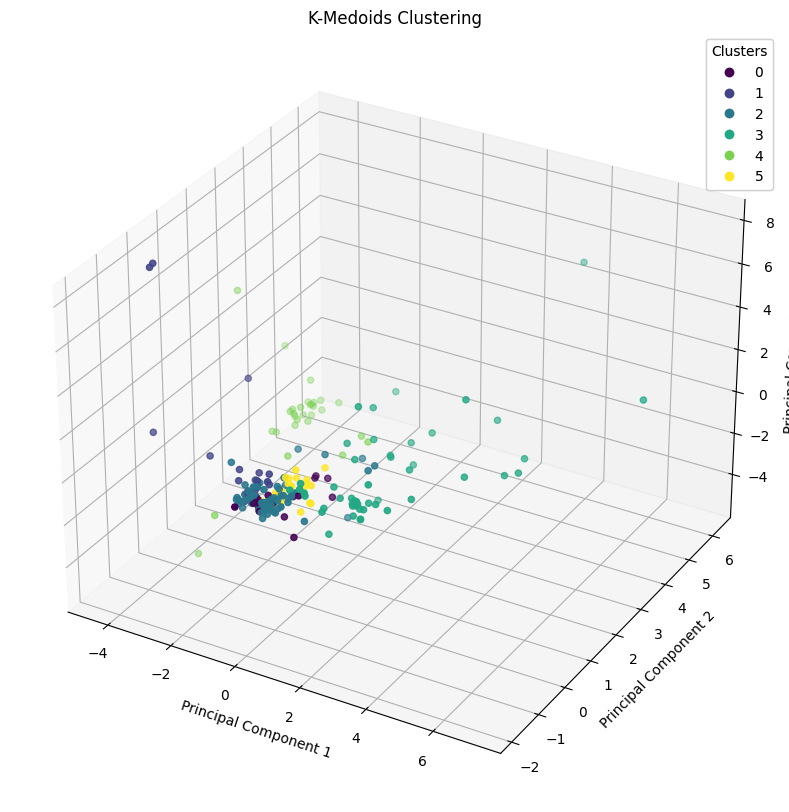

In [ ]:
plot_3d_pca(pca_df,"K-Medoids Clustering" , kmedoids_labels)

In [ ]:
check_balance_of_labels(kmedoids_labels)

2    68
3    48
4    29
5    25
1    24
0    20
Name: count, dtype: int64


## Aglomerative clustering

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=6)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

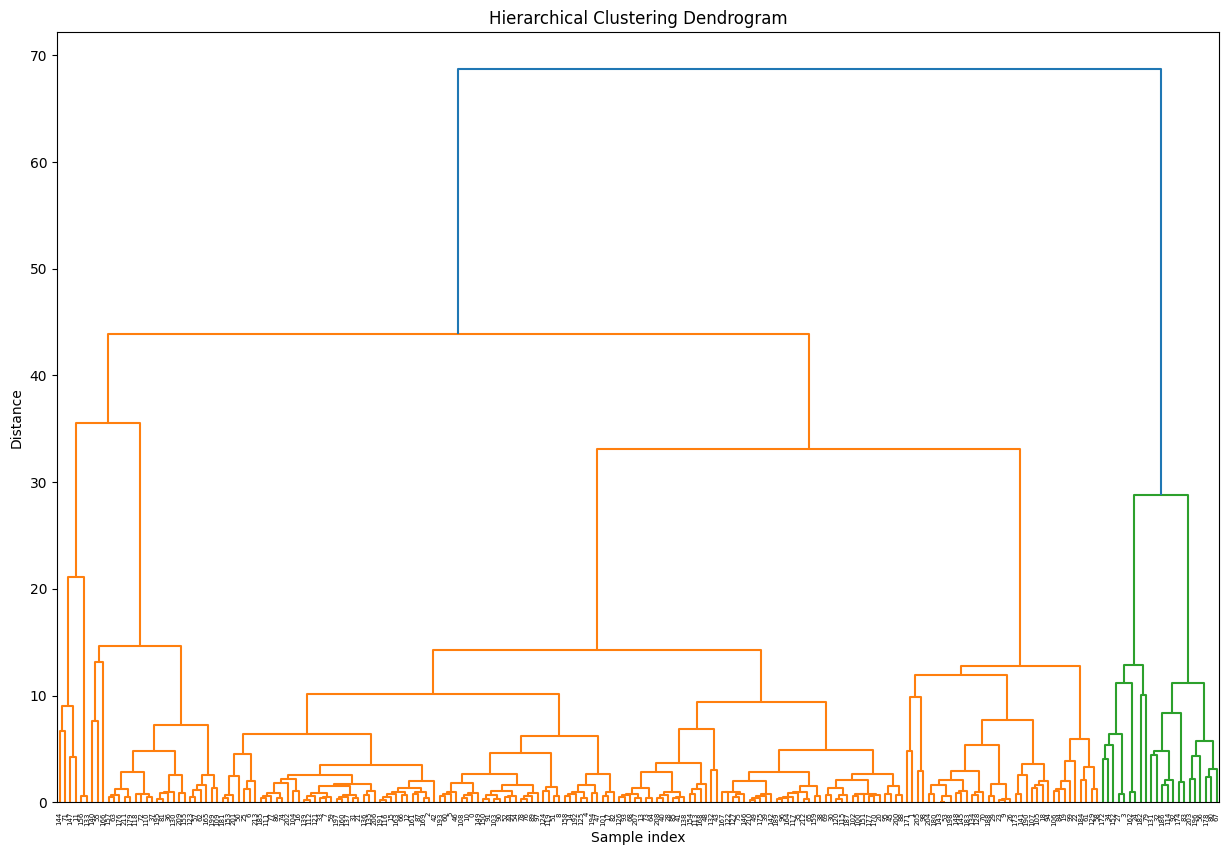

In [ ]:
# Create the linkage matrix for dendrogram
linked = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

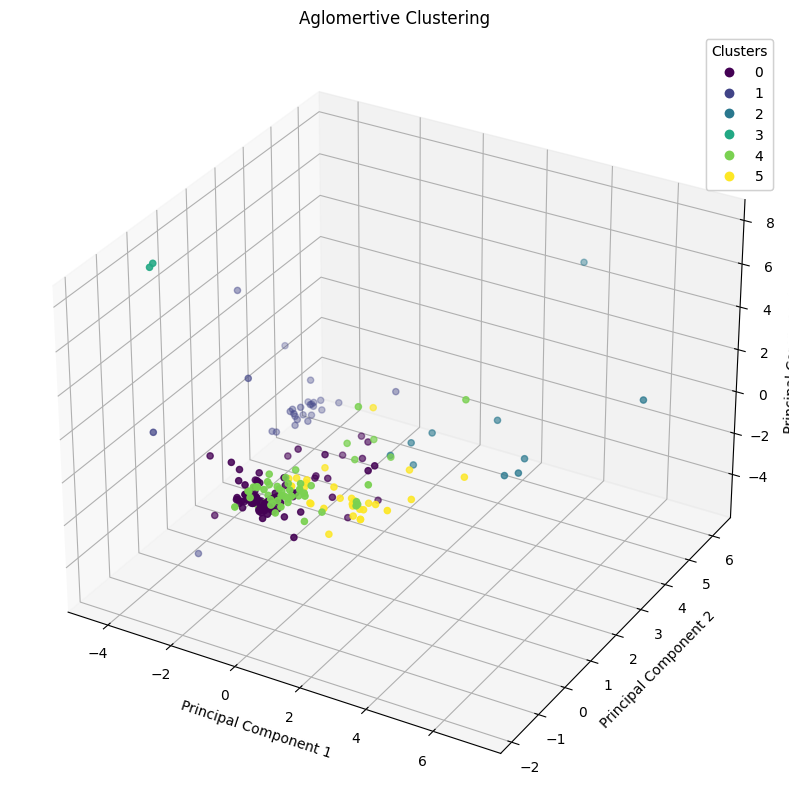

In [ ]:
plot_3d_pca(pca_df,"Aglomertive Clustering" , hierarchical_labels)

## DBScan

In [ ]:
init_eps = 0.01
target_clusters = 5
found_clusters = 0

while found_clusters != target_clusters:
    for samp_num in range(1, 7):
        dbscan = DBSCAN(eps=init_eps, min_samples=samp_num)
        dbscan.fit(data_scaled)
        labels = dbscan.labels_
        unique_labels = np.unique(labels)
        found_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

        print(f"eps: {init_eps}, min_samples: {samp_num}, clusters: {found_clusters}")

        if found_clusters == target_clusters:
            break

    init_eps += 0.1

print(f"Final parameters: eps={init_eps}, min_samples={samp_num}, clusters={found_clusters}")

eps: 0.01, min_samples: 1, clusters: 213
eps: 0.01, min_samples: 2, clusters: 1
eps: 0.01, min_samples: 3, clusters: 0
eps: 0.01, min_samples: 4, clusters: 0
eps: 0.01, min_samples: 5, clusters: 0
eps: 0.01, min_samples: 6, clusters: 0
eps: 0.11, min_samples: 1, clusters: 212
eps: 0.11, min_samples: 2, clusters: 2
eps: 0.11, min_samples: 3, clusters: 0
eps: 0.11, min_samples: 4, clusters: 0
eps: 0.11, min_samples: 5, clusters: 0
eps: 0.11, min_samples: 6, clusters: 0
eps: 0.21000000000000002, min_samples: 1, clusters: 205
eps: 0.21000000000000002, min_samples: 2, clusters: 6
eps: 0.21000000000000002, min_samples: 3, clusters: 3
eps: 0.21000000000000002, min_samples: 4, clusters: 0
eps: 0.21000000000000002, min_samples: 5, clusters: 0
eps: 0.21000000000000002, min_samples: 6, clusters: 0
eps: 0.31000000000000005, min_samples: 1, clusters: 182
eps: 0.31000000000000005, min_samples: 2, clusters: 13
eps: 0.31000000000000005, min_samples: 3, clusters: 6
eps: 0.31000000000000005, min_samples

In [ ]:
dbscan = DBSCAN(eps=init_eps, min_samples=samp_num)
dbscan.fit(data_scaled)
dbscan_labels = dbscan.labels_

In [ ]:
np.unique(dbscan_labels)

array([-1,  0,  1,  2,  3,  4,  5])

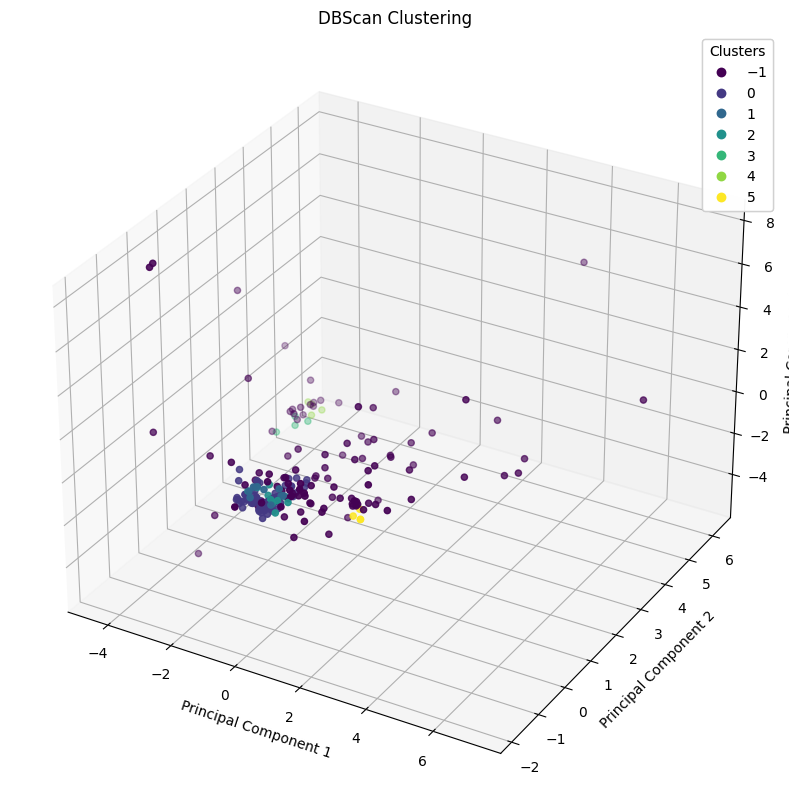

In [ ]:
plot_3d_pca(pca_df,"DBScan Clustering" , dbscan_labels)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

is_noise = (dbscan_labels == -1)
is_clustered = ~is_noise

nearest_indices, _ = pairwise_distances_argmin_min(data_scaled[is_noise], data_scaled[is_clustered])

nearest_labels = dbscan_labels[is_clustered][nearest_indices]
dbscan_labels[is_noise] = nearest_labels

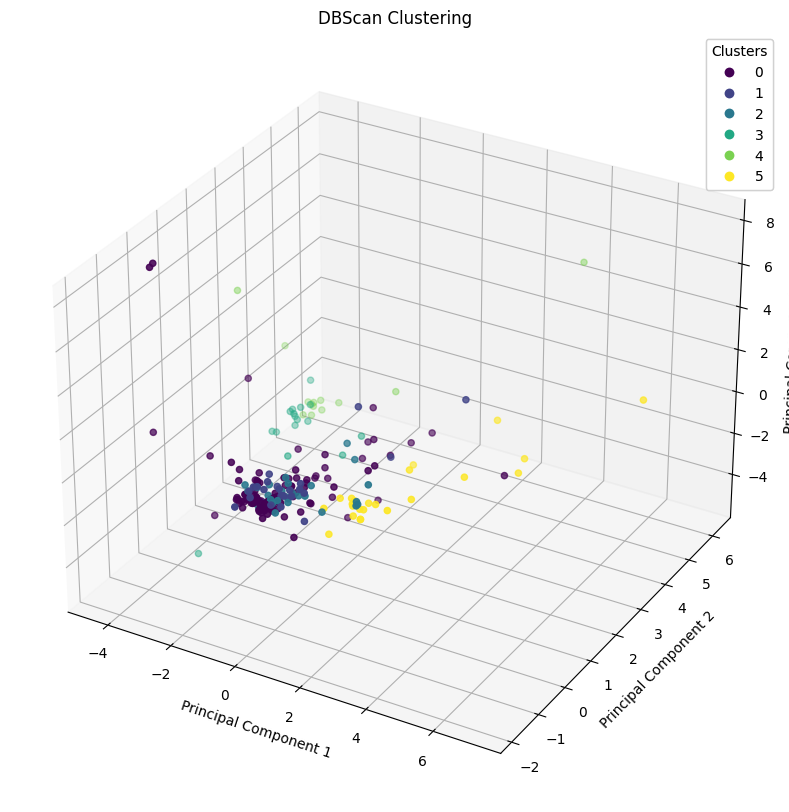

In [ ]:
plot_3d_pca(pca_df,"DBScan Clustering" , dbscan_labels)

## Gaussian mixture model

In [ ]:
gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(data_scaled)
clusters = gmm.predict(data_scaled)
gmm_labels = clusters

bic = gmm.bic(data_scaled)
print(f'BIC: {bic}')

BIC: 487.23394235801106


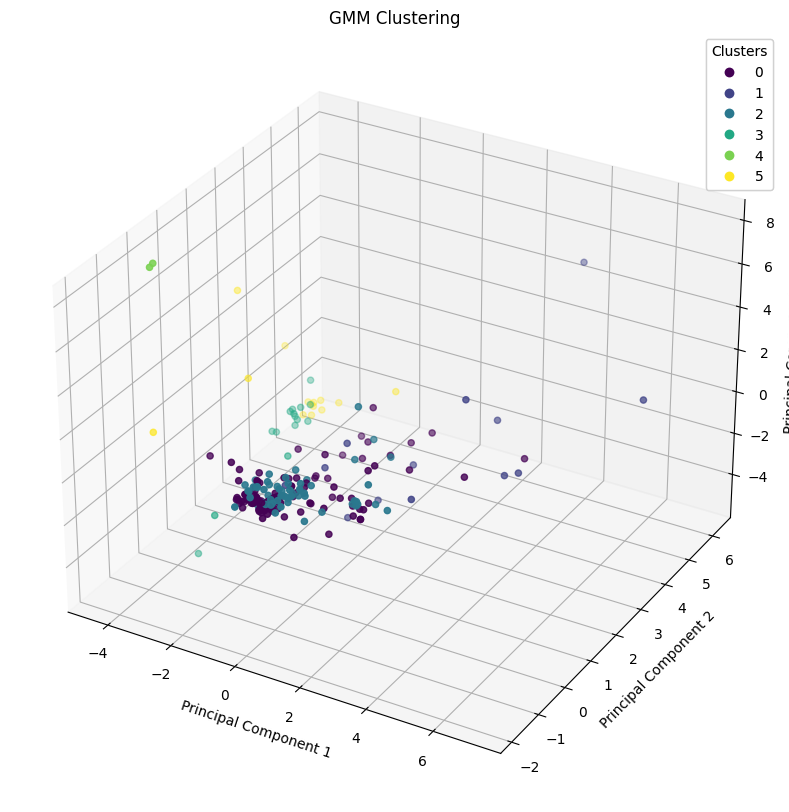

In [ ]:
plot_3d_pca(pca_df,"GMM Clustering" , gmm_labels)

## Silhouette scores comparison

In [ ]:
# Calculate silhouette scores
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
kmedoids_silhouette = silhouette_score(data_scaled, kmedoids_labels)
hier_silhouette = silhouette_score(data_scaled,hierarchical_labels)
dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels)
gmm_silhouette = silhouette_score(data_scaled, gmm_labels)

# Print silhouette scores
print(f'Silhouette Score for K-Means: {kmeans_silhouette:.2f}')
print(f'Silhouette Score for K-Medoids: {kmedoids_silhouette:.2f}')
print(f'Silhouette Score for Agglomerative Clustering: {hier_silhouette:.2f}')
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette:.2f}')
print(f'Silhouette Score for GMM: {gmm_silhouette:.2f}')

Silhouette Score for K-Means: 0.33
Silhouette Score for K-Medoids: 0.02
Silhouette Score for Agglomerative Clustering: 0.28
Silhouette Score for DBSCAN: 0.13
Silhouette Score for GMM: 0.22


In [ ]:
labels_df = pd.DataFrame()

In [ ]:
labels_df['kmeans_labels'] = kmeans_labels
labels_df['kmedoids_labels'] = kmedoids_labels
labels_df['hierarchical_labels'] = hierarchical_labels
labels_df['dbscan_labels'] = dbscan_labels
labels_df['gmm_labels'] = gmm_labels

In [ ]:
labels_df

,kmeans_labels,kmedoids_labels,hierarchical_labels,dbscan_labels,gmm_labels
0,0,2,0,0,0
1,3,3,5,0,0
2,0,2,0,0,0
3,1,3,2,0,0
4,0,5,5,0,0
...,...,...,...,...,...
209,2,4,1,3,3
210,0,2,0,0,0
211,2,4,1,4,5
212,5,2,4,1,2


# Modeling after PCA

## Models

In [ ]:
pca_ = PCA(n_components=6)
principal_components = pca_.fit_transform(data_scaled)

pca_df_ = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5','PC6'])

print(pca_df_)

          PC1       PC2       PC3       PC4       PC5       PC6
0   -0.002281 -0.959298  0.080500  0.021833 -0.628145  0.399203
1    0.588964  1.911679  1.328928  2.713221 -0.707497 -1.504007
2   -0.115255 -1.160282 -0.334021 -0.416516 -0.585436  0.576725
3    1.595042  2.113316 -0.100521 -0.863791 -1.283048 -0.918078
4   -0.081941 -0.343556  0.233091  0.846111 -0.522417 -0.125222
..        ...       ...       ...       ...       ...       ...
209 -2.732312  2.037287 -1.394805 -0.787556  0.151927 -0.705388
210 -0.922562 -1.196929 -0.055477 -0.253577 -0.497821  0.347025
211 -2.397652  3.108236 -1.117502  0.288454  0.624723  0.618056
212 -0.325952 -1.161314  0.681000 -0.694429  1.374831 -0.098544
213  0.983505 -1.020108 -0.484345 -1.739742  1.061050  0.119177

[214 rows x 6 columns]


In [ ]:
kmeans_pca = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans_pca.fit(pca_df_)
kmeans_pca_labels = kmeans_pca.labels_

In [ ]:
kmedoids_pca = KMedoids(n_clusters=6, random_state=42)
kmedoids_pca.fit(pca_df_)
kmedoids_pca_labels = kmedoids_pca.labels_

In [ ]:
hierarchical_pca = AgglomerativeClustering(n_clusters=6)
hierarchical_pca_labels = hierarchical_pca.fit_predict(pca_df_)

In [ ]:
init_eps = 0.01
target_clusters = 5
found_clusters = 0

while found_clusters != target_clusters:
    for samp_num in range(1, 7):
        dbscan_pca = DBSCAN(eps=init_eps, min_samples=samp_num)
        dbscan_pca.fit(pca_df_)
        labels = dbscan_pca.labels_
        unique_labels = np.unique(labels)
        found_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

        print(f"eps: {init_eps}, min_samples: {samp_num}, clusters: {found_clusters}")

        if found_clusters == target_clusters:
            break

    init_eps += 0.1

print(f"Final parameters: eps={init_eps}, min_samples={samp_num}, clusters={found_clusters}")

eps: 0.01, min_samples: 1, clusters: 213
eps: 0.01, min_samples: 2, clusters: 1
eps: 0.01, min_samples: 3, clusters: 0
eps: 0.01, min_samples: 4, clusters: 0
eps: 0.01, min_samples: 5, clusters: 0
eps: 0.01, min_samples: 6, clusters: 0
eps: 0.11, min_samples: 1, clusters: 210
eps: 0.11, min_samples: 2, clusters: 4
eps: 0.11, min_samples: 3, clusters: 0
eps: 0.11, min_samples: 4, clusters: 0
eps: 0.11, min_samples: 5, clusters: 0
eps: 0.11, min_samples: 6, clusters: 0
eps: 0.21000000000000002, min_samples: 1, clusters: 187
eps: 0.21000000000000002, min_samples: 2, clusters: 13
eps: 0.21000000000000002, min_samples: 3, clusters: 5
Final parameters: eps=0.31000000000000005, min_samples=3, clusters=5


In [ ]:
dbscan_pca = DBSCAN(eps=init_eps, min_samples=samp_num)
dbscan_pca.fit(pca_df_)
dbscan_pca_labels = dbscan_pca.labels_

In [ ]:
np.unique(dbscan_pca_labels)

array([-1,  0,  1,  2,  3,  4,  5])

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

is_noise = (dbscan_pca_labels == -1)
is_clustered = ~is_noise

nearest_indices, _ = pairwise_distances_argmin_min(data_scaled[is_noise], data_scaled[is_clustered])

nearest_labels = dbscan_pca_labels[is_clustered][nearest_indices]
dbscan_pca_labels[is_noise] = nearest_labels

In [ ]:
np.unique(dbscan_pca_labels)

array([0, 1, 2, 3, 4, 5])

In [ ]:
gmm_pca = GaussianMixture(n_components=6, random_state=42)
gmm_pca.fit(pca_df_)
clusters = gmm_pca.predict(pca_df_)
gmm_pca_labels = clusters

bic = gmm_pca.bic(pca_df_)
print(f'BIC: {bic}')

BIC: 2217.3130419038425


## After PCA silhouette score comparison

In [ ]:
# Calculate silhouette scores
kmeans_pca_silhouette = silhouette_score(data_scaled, kmeans_pca_labels)
kmedoids_pca_silhouette = silhouette_score(data_scaled, kmedoids_pca_labels)
hier_pca_silhouette = silhouette_score(data_scaled,hierarchical_pca_labels)
dbscan_pca_silhouette = silhouette_score(data_scaled, dbscan_pca_labels)
gmm_pca_silhouette = silhouette_score(data_scaled, gmm_pca_labels)

# Print silhouette scores
print(f'Silhouette Score for K-Means: {kmeans_pca_silhouette:.2f}')
print(f'Silhouette Score for K-Medoids: {kmedoids_pca_silhouette:.2f}')
print(f'Silhouette Score for Agglomerative Clustering: {hier_pca_silhouette:.2f}')
print(f'Silhouette Score for DBSCAN: {dbscan_pca_silhouette:.2f}')
print(f'Silhouette Score for GMM: {gmm_pca_silhouette:.2f}')

Silhouette Score for K-Means: 0.32
Silhouette Score for K-Medoids: 0.09
Silhouette Score for Agglomerative Clustering: 0.28
Silhouette Score for DBSCAN: 0.02
Silhouette Score for GMM: 0.23


# Analysis

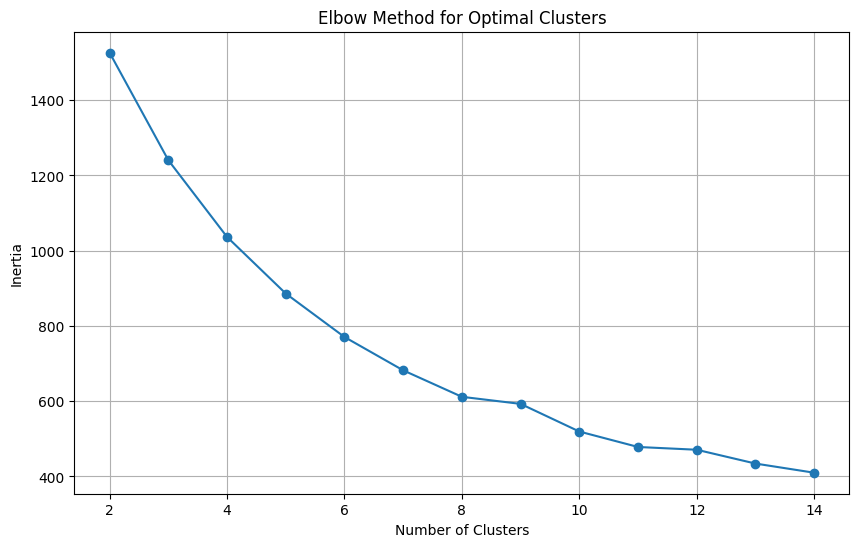

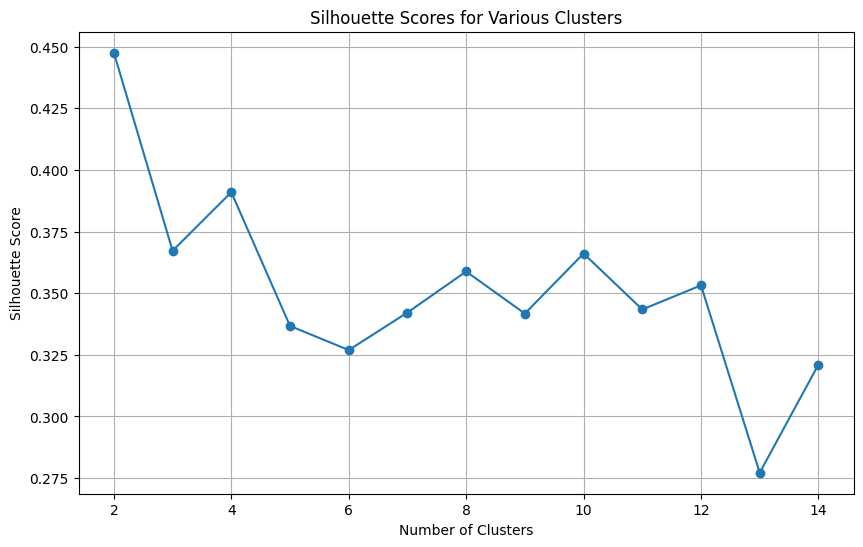

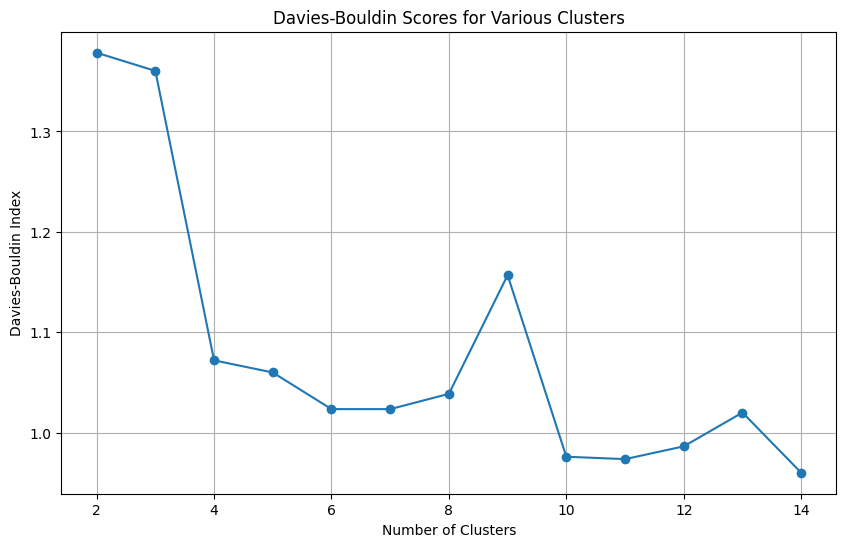

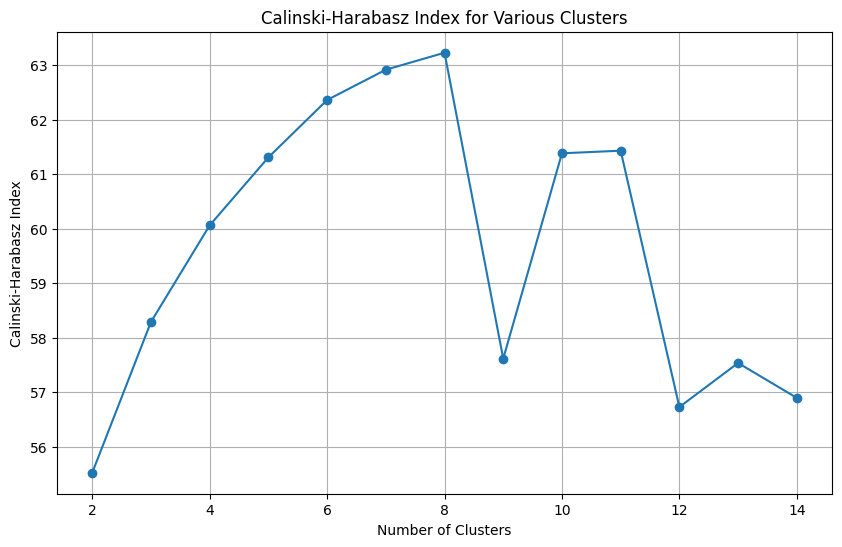

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

cluster_range = range(2, 15)

# Variables to store results
inertias = []
silhouette_scores = []
db_scores = []
ch_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_

    # Calculate metrics
    inertia = kmeans.inertia_
    inertias.append(inertia)

    silhouette = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette)

    db_index = davies_bouldin_score(data_scaled, labels)
    db_scores.append(db_index)

    ch_index = calinski_harabasz_score(data_scaled, labels)
    ch_scores.append(ch_index)

# Plotting the results
# Inertia plot (Elbow Method)
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Silhouette score plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Davies-Bouldin Index plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Scores for Various Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

# Calinski-Harabasz Index plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, ch_scores, marker='o')
plt.title('Calinski-Harabasz Index for Various Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()


In [ ]:
check_balance_of_labels(kmeans_labels)

0    98
5    36
3    33
2    28
1    17
4     2
Name: count, dtype: int64


In [ ]:
check_balance_of_labels(kmedoids_labels)

2    68
3    48
4    29
5    25
1    24
0    20
Name: count, dtype: int64


# Extract clusters

In [ ]:
file_path = '/content/drive/My Drive/Exam/clustering_Tatev.csv'

In [ ]:
df['labels'] = kmeans_labels

In [ ]:
df[['labels']].to_csv(file_path, index=False)